In [1]:
cd C:\Users\venka\OneDrive\Desktop\Project AI

C:\Users\venka\OneDrive\Desktop\Project AI


# Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import random

Import the data

In [3]:
df = pd.read_csv('Indian Cities Database.csv')

In [4]:
df

City        Lat       Long country iso2           State
0          Abohar  30.144533  74.195520   India   IN          Punjab
1        Adilabad  19.400000  78.310000   India   IN       Telangana
2        Agartala  23.836049  91.279386   India   IN         Tripura
3            Agra  27.187935  78.003944   India   IN   Uttar Pradesh
4      Ahmadnagar  19.094571  74.738432   India   IN     Maharashtra
..            ...        ...        ...     ...  ...             ...
208  Vizianagaram  18.113290  83.397743   India   IN  Andhra Pradesh
209      Warangal  17.978423  79.600209   India   IN       Telangana
210    Jorapokhar  23.700000  86.412670   India   IN       Jharkhand
211  Brajrajnagar  21.820000  83.920000   India   IN          Odisha
212       Talcher  20.950000  85.230000   India   IN          Odisha

[213 rows x 6 columns]

In [5]:
df['City'].nunique()

213

Removing some errors in the dataset.

In [6]:
df['City'] = df['City'].replace(['Chandigarh '],'Chandigarh')

In [7]:
df['City'] = df['City'].replace(['Shillong '],'Shillong')
df['City'] = df['City'].replace(['Aizawl  '],'Aizawl')
df['City'] = df['City'].replace(['Bhopal '],'Bhopal')
df['City'] = df['City'].replace(['Kolkata '],'Kolkata')

In [8]:
df.describe()

Lat        Long
count  213.000000  213.000000
mean    21.734604   79.341943
std      6.394908    5.335423
min      8.177313   69.600868
25%     16.960361   75.853789
50%     22.576882   78.000000
75%     26.884682   81.428497
max     34.318174   94.908370

In [9]:
#sorting by city name
df = df.sort_values(by=['City'])

In [10]:
df.reset_index(inplace=True)

In [11]:
df.shape

(213, 7)

In [12]:
df

index            City        Lat       Long country iso2           State
0        0          Abohar  30.144533  74.195520   India   IN          Punjab
1        1        Adilabad  19.400000  78.310000   India   IN       Telangana
2        2        Agartala  23.836049  91.279386   India   IN         Tripura
3        3            Agra  27.187935  78.003944   India   IN   Uttar Pradesh
4        4      Ahmadnagar  19.094571  74.738432   India   IN     Maharashtra
..     ...             ...        ...        ...     ...  ...             ...
208    205        Varanasi  25.317740  83.005811   India   IN   Uttar Pradesh
209    206         Vellore  12.905769  79.137104   India   IN     Tamil Nadu 
210    207  Vishakhapatnam  17.704052  83.297663   India   IN  Andhra Pradesh
211    208    Vizianagaram  18.113290  83.397743   India   IN  Andhra Pradesh
212    209        Warangal  17.978423  79.600209   India   IN       Telangana

[213 rows x 7 columns]

In [13]:
#Getting the important data like lat, long and cities to list
lat = df['Lat'].tolist()
long = df['Long'].tolist()
cities = df['City'].tolist()

Algorithm to check wether we can reach all the points from any starting point.

In [14]:
def connected(matrix):
    def bfs(city):
        for i,go in enumerate(matrix[city]):
            if i not in visited and go==1:
                visited.add(i)
                bfs(i)
    visited = set()
    bfs(0)
    #print(visited)
    if len(visited)==len(matrix):
        return True
    else:
        return False     

In [15]:
#Setting up the connectivity matrix
matrix = [[0]*213 for _ in range(213)]

In [16]:
#Cities are obviously connected to themselves
for i in range(213):
    for j in range(213):
        if i==j:
            matrix[i][j] = 1

Iterativiely update matrix until we get fully connected graph that means we can reach all the points from any starting point.

In [17]:
while connected(matrix)==False:
    i = random.randint(0,212)
    j = random.randint(0,212)
    if matrix[i][j] == 0:
        matrix[i][j] = 1

Counting the number of total connections

In [18]:
c = 0
for i in range(213):
    for j in range(213):
        if matrix[i][j] == 1:
            c+=1
print('We have total connections of: ',c - 213)

We have total connections of:  1420


# Create distance matrix using OSMR API

In [19]:
distances = [[0]*213 for _ in range(213)]

Real distance between the cities is gathered usin the code block.

In [20]:
import requests
import json
# call the OSMR API
for i in range(213):
    for j in range(213):
        if matrix[i][j] == 1:
            try:
                r = requests.get(f"http://router.project-osrm.org/route/v1/car/{long[i]},{lat[i]};{long[j]},{lat[j]}?overview=false""")
                # then you load the response using the json libray
                # by default you get only one alternative 
                # so you access 0-th element of the `routes`
                routes = json.loads(r.content)
                route_1 = routes.get("routes")[0]
                distances[i][j] = route_1['distance']/1000
            except:
                distances[i][j] = 5000
    if i%10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210


In [21]:
# Prepare ajacency list based on the connections eastablished earlier
adjacency_list = {}
for i,city in enumerate(cities):
    adjacency_list[city] = []
    for j in range(len(cities)):
        if matrix[i][j] == 1:
            adjacency_list[city].append((cities[j],distances[i][j]))

# Make a heuristic matrix. 

We consider heuristic as direct arieal distance between any two cities.

In [22]:
# Python 3 program to calculate Distance Between Two Points on Earth
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)

# A* Algorithm to find distance between start and goal cities

In [23]:
from collections import deque
 
class Graph:
    def __init__(self, adjac_lis, lat, long, cities):
        self.adjac_lis = adjac_lis
        self.lat = lat
        self.long = long
        self.cities = cities
 
    def get_neighbors(self, v):
        return self.adjac_lis[v]
 
    # This is heuristic function which is having equal values for all nodes
    def h(self, city,stop):
        i = self.cities.index(city)
        j = self.cities.index(stop)
        d=distance(self.lat[i], self.lat[j], self.long[i], self.long[j])
        return d
 
    def a_star_algorithm(self, start, stop):
        # In this open_lst is a list of nodes which have been visited, but who's 
        # neighbours haven't all been always inspected, It starts off with the start 
  #node
        # And closed_lst is a list of nodes which have been visited
        # and who's neighbors have been always inspected
        open_lst = set([start])
        closed_lst = set([])
 
        # poo has present distances from start to all other nodes
        # the default value is +infinity
        poo = {}
        poo[start] = 0
 
        # par contains an adjac mapping of all nodes
        par = {}
        par[start] = start
 
        while len(open_lst) > 0:
            n = None
 
            # it will find a node with the lowest value of f() -
            for v in open_lst:
                if n == None or poo[v] + self.h(v,stop) < poo[n] + self.h(n,stop):
                    n = v;
 
            if n == None:
                print('Path does not exist!')
                return None
 
            # if the current node is the stop
            # then we start again from start
            if n == stop:
                reconst_path = []
 
                while par[n] != n:
                    reconst_path.append(n)
                    n = par[n]
 
                reconst_path.append(start)
 
                reconst_path.reverse()
 
                #print('Path found: {}'.format(reconst_path))
                return reconst_path, poo[stop]
 
            # for all the neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
              # if the current node is not presentin both open_lst and closed_lst
                # add it to open_lst and note n as it's par
                if m not in open_lst and m not in closed_lst:
                    open_lst.add(m)
                    par[m] = n
                    poo[m] = poo[n] + weight
 
                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update par data and poo data
                # and if the node was in the closed_lst, move it to open_lst
                else:
                    if poo[m] > poo[n] + weight:
                        poo[m] = poo[n] + weight
                        par[m] = n
 
                        if m in closed_lst:
                            closed_lst.remove(m)
                            open_lst.add(m)
 
            # remove n from the open_lst, and add it to closed_lst
            # because all of his neighbors were inspected
            open_lst.remove(n)
            closed_lst.add(n)
 
        #print('Path does not exist!')
        return [5000]

Testing the algoithm

In [24]:
graph1 = Graph(adjacency_list,lat,long,cities)
path = graph1.a_star_algorithm('Nagercoil','Shimoga')

In [25]:
# Example output
path

(['Nagercoil', 'Jaipur', 'Adilabad', 'Shimoga'], 4559.0838)

# Final Algorithm

In [26]:
cd C:\Users\venka\OneDrive\Desktop\Sem 7\AIFA Project

C:\Users\venka\OneDrive\Desktop\Sem 7\AIFA Project


In [27]:
df_cost =  pd.read_csv('cityprice.csv')

In [28]:
df_cost['City'].nunique()

213

Part Tree

In [29]:
#this part_tree and use dictinary represents the tree stuture of the dependencies for each part in the manufacturing process

In [30]:
part_tree = {'Main assembly':['Fuselage assembly','Wing assembly','Engine'],'Fuselage assembly':['Fuselage Nose','Fuselage Mid','Fuselage rare'],'Fuselage Nose':['Fuselage raw'],'Fuselage Mid':['Fuselage raw'],'Fuselage rare':['Frame','Tail Assembly'],'Frame':['Fuselage raw'],'Tail Assembly':['Tail main','Tail CS','actuators'],'Tail main':['Tail raw'],'Tail CS':['Tail raw'],'actuators':['Tail raw'],'Tail raw':[],'Wing assembly':['Wing main','Wing CS'],'Wing main':['Front Raw'],'Wing CS':['Front Raw'],'Front Raw':[],'Engine':['Engine Raw'],'Engine Raw':[],'Fuselage raw':[]}

In [31]:
use = {'Main assembly':['Fuselage assembly','Wing assembly','Engine'],'Fuselage assembly':['Fuselage Nose','Fuselage Mid','Fuselage rare'],'Fuselage Nose':['Fuselage raw'],'Fuselage Mid':['Fuselage raw'],'Fuselage rare':['Frame','Tail Assembly'],'Frame':['Fuselage raw'],'Tail Assembly':['Tail main','Tail CS','actuators'],'Tail main':['Tail raw'],'Tail CS':['Tail raw'],'actuators':['Tail raw'],'Tail raw':[],'Wing assembly':['Wing main','Wing CS'],'Wing main':['Front Raw'],'Wing CS':['Front Raw'],'Front Raw':[],'Engine':['Engine Raw'],'Engine Raw':[],'Fuselage raw':[]}

The objective in designing the final algorithm is to identify the minimum final cost for the total assembly at each and every main assembly centre. In our problem we assumed that the cost of production arises only due to these three factors i.e. 1) Part cost, 2) Assembly service charges and 3) Transport expenses to shift the parts from one factory to the other. We have considered each and every node in the manufacturing tree where production or assembly happens. Adding every city to the particular node where a specific function in the node happens in that cities and this will form a new tree called cost tree. This cost tree is updated with the best cost for every city in that node to get that functionality ready as the algorithm progresses. Since aircraft can only be formed when every part in the tree is considered. This constraints our algorithm to perform a search for every node in the manufacturing tree. We made a dictionary to store costs in that city. We obtained the cost and part manufactured in that city from cityprice dataset which we made available in the GitHub repo. Firstly we added to cost to cities which don’t have to depend on other cities that means parts which are manufactured in that cities have no subparts. If the city is dependent on some other city then the cost for that city is initialized to inf and will be updated later. This process is represented in algorithm 1.


In [32]:
cost_part_city = {}
basic_part_city = {}
best_dependencies = {}

In [33]:
for key in part_tree:
    d = {}
    for city in df_cost[df_cost["Part"] == key]['City'].tolist():
        d[city] = float('inf')
    for city in d:
        basic_part_city[city] = df_cost[df_cost['City'] == city]['Price'].tolist()[0]
    if part_tree[key]==[]:
        for city in d:
            d[city] = df_cost[df_cost['City'] == city]['Price'].tolist()[0]
    cost_part_city[key] = d

Cost for the cities is further updated with algorithm 2. If the dependencies are already manufactured for any node. Then each and every city in that node is considered and the best cost for that city has to be calculated. The best cost to complete the part manufacturing in that city will be obtained by choosing the best dependency (the dependent city where costs are low) for that part is considered. Costs will also be varying with the distance between the current city and the dependent city and also the basic cost will be added to the best cost for that city. This process goes on iteratively until all the parts are manufactured. This process is represented in algorithm 2.

In [34]:
done = set()
while(len(done)<18):
    cont = '1'
    if cont=='1':
        print(len(done))
        for part in use:
            #print(part)
            if use[part]!=[] and len(set(use[part])-set(done))==0:
                for city in cost_part_city[part]:
                    cost = 0
                    bdc = []
                    for depend in use[part]:
                        c = float('inf')
                        bc='a'
                        for citydep in cost_part_city[depend]:
                            try:
                                if cost_part_city[depend][citydep]+100*graph1.a_star_algorithm(city,citydep)[-1] + basic_part_city[city] < c:
                                    bc = citydep
                                    c = cost_part_city[depend][citydep]+100*graph1.a_star_algorithm(city,citydep)[-1]+ basic_part_city[city]
                            except:
                                if cost_part_city[depend][citydep]+100*graph1.a_star_algorithm(citydep,city)[-1] + basic_part_city[city]< c:
                                    bc = citydep
                                    c = cost_part_city[depend][citydep]+100*graph1.a_star_algorithm(citydep,city)[-1]+ basic_part_city[city]
                        bdc.append(bc)
                        cost+=c
                    best_dependencies[city] = bdc.copy()
                    cost_part_city[part][city] = cost
                done.add(part)
            if use[part]==[]:
                done.add(part)
    else:
        break

0
4
13
15
16
17


Final cost after manufacturing of aircraft at Main Assembly plants.

In [35]:
cost_part_city['Main assembly']

{'Abohar': 7759536.55,
 'Adilabad': 7964120.19,
 'Agartala': 8169674.800000001,
 'Agra': 7789402.9799999995,
 'Ahmadnagar': 7911418.879999999,
 'Ahmedabad': 7756548.540000001,
 'Aizawl': 8071333.26,
 'Ajmer': 7534482.32,
 'Akola': 7726471.68,
 'Alappuzha': 8090391.079999999}

In [36]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Best cost for manufacturing the aircraft.')

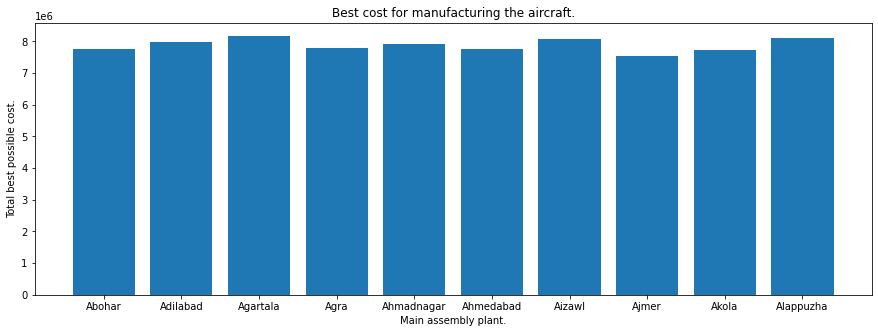

In [37]:
plt.figure(figsize=(15,5))
plt.bar(*zip(*cost_part_city['Main assembly'].items()))
plt.xlabel('Main assembly plant.')
plt.ylabel('Total best possible cost.')
plt.title('Best cost for manufacturing the aircraft.')

Final output

In [66]:
keys = list(cost_part_city['Main assembly'].keys())
values = list(cost_part_city['Main assembly'].values())
best_city = keys[values.index(min(values))]
b_cost = cost_part_city['Main assembly'][best_city]
print('Finally we can say that best profits can be achieved by completing the manufacturing in the',keys[values.index(min(values))],'city.')

Finally we can say that best profits can be achieved by completing the manufacturing in the Ajmer city.


Obtaining total cities for best manufacturing criteria

In [56]:
path = set()
curr = best_city
def dfs(city):
    path.add(city)
    if city in best_dependencies:
        golist = best_dependencies[city]
        for go in golist:
            path.add(go)
            dfs(go)
dfs(curr)

In [57]:
path

{'Ajmer',
 'Aligarh',
 'Bharatpur',
 'Bijapur',
 'Bilaspur',
 'Delhi',
 'Ghaziabad',
 'Hapur',
 'Jaipur',
 'Jodhpur',
 'Kota',
 'Meerut',
 'Moradabad',
 'Pali',
 'Patna',
 'Pilibhit',
 'Purnea',
 'Ramagundam',
 'Rampura',
 'Rohtak',
 'Talcher',
 'Tharati Etawah'}

In [58]:
df2 = pd.DataFrame()
df2['City'] = list(path)

In [60]:
df_final = pd.merge(df_cost, df2, on="City")

Table which shows best cities which are considered along with the part price

In [63]:
df_final

City               Part     Price  Quality
0            Ajmer      Main assembly   56467.0     85.0
1          Aligarh  Fuselage assembly   32963.0     75.0
2        Bharatpur      Wing assembly    4964.0     99.0
3          Bijapur             Engine  754824.0     83.0
4         Bilaspur      Fuselage Nose  443495.0     85.0
5            Delhi       Fuselage Mid  786644.0     84.0
6        Ghaziabad      Fuselage rare  384723.0     72.0
7            Hapur              Frame  135875.0     99.0
8           Jaipur      Tail Assembly    5036.0     80.0
9          Jodhpur          Tail main  107380.0     90.0
10            Kota            Tail CS   79002.0     73.0
11          Meerut          actuators   83057.0     62.0
12       Moradabad          Wing main  207601.0     90.0
13            Pali            Wing CS   86458.0     89.0
14           Patna       Fuselage raw  258184.0     67.0
15        Pilibhit       Fuselage raw  297772.0     94.0
16          Purnea       Fuselage raw  269012.0     88.0
17      Ramagundam           Tail raw  139652.0     63.0
18         Rampura           Tail raw  126479.0     98.0
19          Rohtak           Tail raw  129293.0     96.0
20  Tharati Etawah          Front Raw   81361.0     68.0
21         Talcher         Engine Raw  323142.0     73.0